<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/TF_10_4_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_RNN_%EB%B6%84%EB%A5%98_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치 RNN 분류 모델
- 코드 출처: https://tutorials.pytorch.kr/intermediate/char_rnn_classification_tutorial.html

In [ ]:
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip

--2022-07-12 23:35:58--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 18.160.200.77, 18.160.200.71, 18.160.200.126, ...
Connecting to download.pytorch.org (download.pytorch.org)|18.160.200.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip.1’

data.zip.1          100%[===================>]   2.75M  --.-KB/s    in 0.07s   

2022-07-12 23:35:58 (41.1 MB/s) - ‘data.zip.1’ saved [2882130/2882130]

Archive:  data.zip
replace data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

이름: Ślusàrski

In [ ]:
from io import open
import glob
import os

def findFiles(path):
  return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;"
n_letters = len(all_letters)

def unicodeToAscii(s):
  return ''.join(
      c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mh' and c in all_letters
  )

#print(unicodeToAscii('Ślusàrski'))

category_lines = {}
all_categories = []

def readLines(filename):
  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  category_lines[category] = lines

n_categories = len(all_categories)

all_categories

In [ ]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [ ]:
import torch

def letterToIndex(letter):
  return all_letters.find(letter)

def letterToTensor(letter):
  tensor = torch.zeros(1, n_letters)
  tensor[0][letterToIndex(letter)] = 1
  return tensor

def lineToTensor(line):
  tensor = torch.zeros(len(line), 1, n_letters)
  for li, letter in enumerate(line):
    tensor[li][0][letterToIndex(letter)] = 1
  return tensor

print(letterToTensor('J'))
print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])
torch.Size([5, 1, 56])


## 신경망 생성

- 모델 생성 방법 참고 : https://pytorch.org/tutorials/beginner/former_torchies/nnft_tutorial.html

In [ ]:
import torch.nn as nn

class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):
    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)
    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(output, next_hidden)

tensor([[-3.0133, -3.0261, -2.9558, -2.8513, -2.9182, -2.8102, -2.8802, -2.8076,
         -2.9380, -2.9511, -2.8958, -2.8366, -2.8459, -2.8608, -2.8386, -2.8806,
         -2.8609, -2.8894]], grad_fn=<LogSoftmaxBackward0>) tensor([[-0.1050, -0.0207,  0.0375, -0.0388, -0.0214, -0.0184, -0.0302,  0.0770,
         -0.0700,  0.1127,  0.0022,  0.0748,  0.0909,  0.0874, -0.0636, -0.0129,
          0.0747,  0.0504,  0.0007,  0.0367, -0.0371,  0.0010,  0.0080, -0.0941,
          0.1279, -0.0570, -0.0397, -0.0378, -0.0043,  0.0044, -0.0937, -0.0805,
          0.1096, -0.1066,  0.1228,  0.0128,  0.0463, -0.0935,  0.0117,  0.0140,
          0.0424,  0.0820,  0.0029, -0.0197, -0.1146, -0.0962,  0.0096,  0.0327,
          0.0388,  0.0109, -0.0091, -0.0067, -0.1123, -0.0829, -0.0047, -0.0336,
         -0.0202, -0.0236, -0.0166,  0.1208, -0.0316,  0.0453, -0.0868, -0.0050,
          0.0794,  0.0776,  0.0218,  0.0233, -0.0771,  0.0097, -0.0791,  0.0680,
         -0.1069, -0.0295, -0.1032, -0.0570,  0.0

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-3.0133, -3.0261, -2.9558, -2.8513, -2.9182, -2.8102, -2.8802, -2.8076,
         -2.9380, -2.9511, -2.8958, -2.8366, -2.8459, -2.8608, -2.8386, -2.8806,
         -2.8609, -2.8894]], grad_fn=<LogSoftmaxBackward0>)


## 모델 학습
- 준비

In [ ]:
def categoryFromOutput(output):
  top_n, top_i = output.topk(1)
  category_i = top_i[0].item()
  return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Chinese', 7)


In [ ]:
import random

def randomChoice(l):
  return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
  category = randomChoice(all_categories)
  line = randomChoice(category_lines[category])
  category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
  line_tensor = lineToTensor(line)
  return category, line, category_tensor, line_tensor

for i in range(10):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  print('category: {}\tline: {}'.format(category, line))

category: Russian	line: Shakhmin
category: French	line: Villeneuve
category: Vietnamese	line: Doan
category: Polish	line: Zabek
category: Portuguese	line: Simoes
category: Vietnamese	line: Thuy
category: Korean	line: Jeon
category: Chinese	line: Ruan
category: Japanese	line: Temko
category: French	line: Traver


## 손실함수

In [ ]:
criterion = nn.NLLLoss()

## 모델 학습

In [ ]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
  hidden = rnn.initHidden()

  rnn.zero_grad()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  loss = criterion(output, category_tensor)
  loss.backward()

  for p in rnn.parameters():
    p.data.add_(p.grad.data, alpha=-learning_rate)

  return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000

current_loss = 0
all_losses = []

def timeSince(since):
  now = time.time()
  s = now - since
  m = math.floor(s / 60)
  s -= m * 60
  return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output, loss = train(category_tensor, line_tensor)
  current_loss += loss

  if iter % print_every == 0:
    guess, guess_i = categoryFromOutput(output)
    correct = '0' if guess == category else 'X (%s)' % category
    print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter/n_iters * 100, timeSince(start), loss, line, guess, correct))

  if iter % plot_every == 0:
    all_losses.append(current_loss / plot_every)
    current_loss = 0


5000 5% (0m 5s) 1.8201 Gomes / Portuguese 0
10000 10% (0m 11s) 0.2577 Zouvelekis / Greek 0
15000 15% (0m 16s) 1.9206 Arthur / Arabic X (French)
20000 20% (0m 21s) 2.2098 Kinnison / Scottish X (English)
25000 25% (0m 27s) 4.3273 Fay / Chinese X (French)
30000 30% (0m 32s) 1.9488 Palumbo / Portuguese X (Italian)
35000 35% (0m 37s) 2.5713 Garrastazu / Japanese X (Spanish)
40000 40% (0m 42s) 1.5757 Gniewek / Czech X (Polish)
45000 45% (0m 48s) 1.1605 Pinho / Portuguese 0
50000 50% (0m 53s) 0.7088 Gabler / German 0
55000 55% (0m 58s) 0.5053 Handal / Arabic 0
60000 60% (1m 3s) 2.2753 Fuentes / Portuguese X (Spanish)
65000 65% (1m 8s) 2.0296 Blythe / Japanese X (English)
70000 70% (1m 14s) 1.4918 Chikanatsu / Arabic X (Japanese)
75000 75% (1m 19s) 0.0191 Jirnyakov / Russian 0
80000 80% (1m 24s) 0.0178 Schwarzenberg / Dutch 0
85000 85% (1m 30s) 0.3762 Suk / Korean 0
90000 90% (1m 35s) 0.3023 Watson / Scottish 0
95000 95% (1m 43s) 3.3140 Bohn / Vietnamese X (German)
100000 100% (1m 50s) 0.0617 

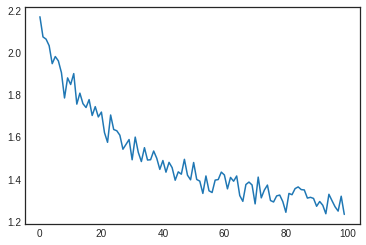

In [ ]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.plot(all_losses)
plt.show()

## 모델 테스트

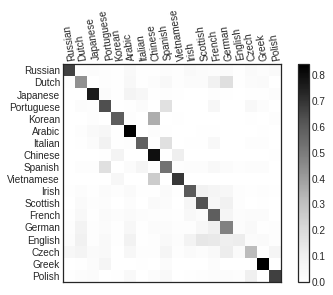

In [ ]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

def evaluate(line_tensor):
  hidden = rnn.initHidden()

  for i in range(line_tensor.size()[0]):
    output, hidden = rnn(line_tensor[i], hidden)

  return output

for i in range(n_confusion):
  category, line, category_tensor, line_tensor = randomTrainingExample()
  output = evaluate(line_tensor)
  guess, guess_i = categoryFromOutput(output)
  category_i = all_categories.index(category)
  confusion[category_i][guess_i] +=1

for i in range(n_categories):
  confusion[i] = confusion[i] / confusion[i].sum()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)
ax.set_xticklabels([''] + all_categories, rotation=99)
ax.set_yticklabels([''] + all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

## 사용자 입력으로부터의 실행

In [ ]:
def predict(input_line, n_predictions=3):
  print('\n> %s' % input_line)
  with torch.no_grad():
    output = evaluate(lineToTensor(input_line))

    topv, topi = output.topk(n_predictions, 1, True)
    predictions = []

    for i in range(n_predictions):
      value = topv[0][i].item()
      category_index = topi[0][i].item()
      print('(%.2f) %s' % (value, all_categories[category_index]))
      predictions.append([value, all_categories[category_index]])

predict('Jackson')
predict('Bill')
predict('Dovesky')
predict('Kim')


> Jackson
(-0.27) Scottish
(-2.05) English
(-3.34) Russian

> Bill
(-1.56) Irish
(-1.63) English
(-2.09) German

> Dovesky
(-0.43) Russian
(-1.39) Czech
(-3.00) English

> Kim
(-1.16) Korean
(-1.33) Chinese
(-2.19) Vietnamese
